<a href="https://colab.research.google.com/github/Sreenithy22/Machine-Learning-Projects/blob/main/Vehicle_XCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost


In [2]:
import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
from google.colab import files
uploaded = files.upload()

Saving vehicle_data.csv to vehicle_data.csv


In [4]:
import pandas as pd

df = pd.read_csv("vehicle_data.csv")
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [6]:
df.describe()
df.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


In [7]:
df = df.dropna()  #cleaning data
df.isnull().sum()  #check again

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [8]:
X = df.drop("price", axis=1)
y = df["price"]


In [9]:
X = pd.get_dummies(X, drop_first=True)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)

In [16]:
xgb_model.fit(X_train_np, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [20]:
y_pred = xgb_model.predict(X_test_np)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4112.4223046875
MSE: 54740336.0588545
R2 Score: 0.8444038552119262


In [22]:
from sklearn.model_selection import cross_val_score

X_np = X.values
y_np = y.values

cv_scores = cross_val_score(
    xgb_model,
    X_np,
    y_np,
    cv=5,
    scoring="r2"
)

print("CV R2 scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())


CV R2 scores: [0.77298767 0.88420561 0.83575564 0.8495476  0.86236834]
Average CV R2: 0.8409729738519214


In [23]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror",
    n_jobs=1
)


In [25]:
sample_vehicle = X.iloc[0:1].values
xgb_model.fit(X_train_np, y_train)
xgb_model.predict(sample_vehicle)

array([76757.805], dtype=float32)

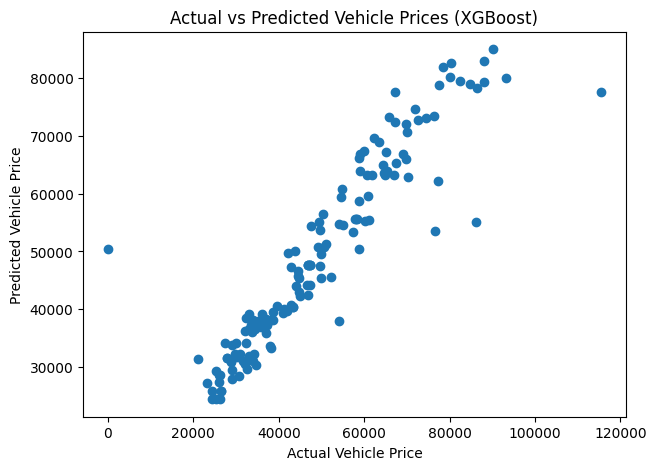

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Vehicle Price")
plt.ylabel("Predicted Vehicle Price")
plt.title("Actual vs Predicted Vehicle Prices (XGBoost)")
plt.show()


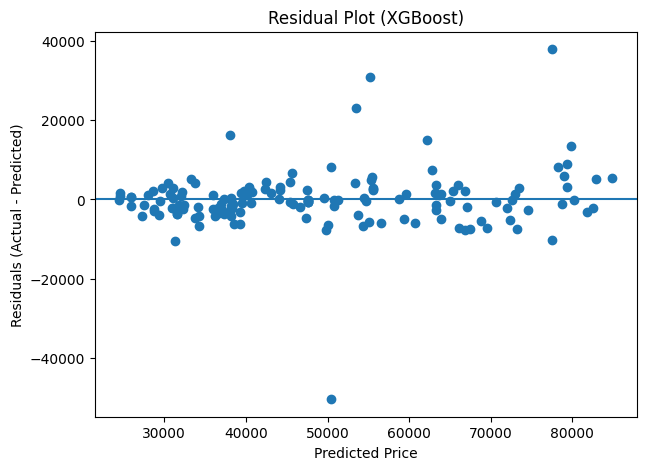

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (XGBoost)")
plt.show()


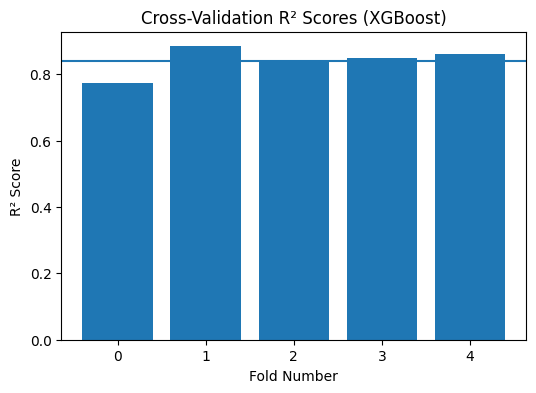

In [28]:
import numpy as np

plt.figure(figsize=(6,4))
plt.bar(range(len(cv_scores)), cv_scores)
plt.axhline(y=cv_scores.mean())
plt.xlabel("Fold Number")
plt.ylabel("R² Score")
plt.title("Cross-Validation R² Scores (XGBoost)")
plt.show()
